In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv('cost dataset.csv')

# Preprocess data (handle missing values, encode categorical variables, etc.)
# Example:
# data = data.dropna()  # Drop rows with missing values
# data['image_format'] = pd.get_dummies(data['image_format'])  # One-hot encode categorical variable

# Split dataset into features and target variable
# Split dataset into features and target variable
# Check data types of features and target variable
print(data.dtypes)

# Convert non-numeric columns to numeric if needed
# Example:
# data['server_type'] = pd.factorize(data['server_type'])[0]  # Convert categorical column to numeric using factorization

# Ensure all features and the target variable are numeric)


text_type                  int64
text_characters            int64
image_width                int64
image_height               int64
image_resolution           int64
image_complexity           int64
compression_level          int64
processing_time            int64
server_type               object
region                    object
data_transfer(KB)        float64
peak_usage                object
concurrency                int64
security_requirements     object
data_locality             object
image_format              object
cost                     float64
dtype: object


In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv("cost dataset.csv")

# Convert columns to numeric format
numeric_columns = ['text_characters', 'image_width', 'image_height', 'image_resolution', 'image_complexity', 'compression_level', 'data_transfer(KB)', 'concurrency', 'processing_time']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Perform one-hot encoding for categorical variables
categorical_columns = ['server_type', 'region', 'peak_usage', 'security_requirements', 'data_locality', 'image_format']
data = pd.get_dummies(data, columns=categorical_columns)

# Handle missing values if any
# For example, you can replace missing numeric values with the mean of the column
data.fillna(data.mean(), inplace=True)

# Split dataset into features and target variable
X = data.drop(columns=['cost'])  # Features
y = data['cost']  # Target variable

# Further preprocessing steps (scaling, feature selection, etc.) can be added here

# Now you can proceed with model training, validation, and evaluation


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Step 1: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Selecting a Model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 3: Training the Model
model.fit(X_train, y_train)

# Step 4: Evaluating the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 5: Fine-tuning the Model
# You can experiment with hyperparameters and model architectures here

# Step 6: Final Model Deployment
# Once you're satisfied with the model's performance, deploy it for inference


Mean Squared Error: 132.89300325644936


Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
# Assuming X contains the features and y contains the target variable (cost)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)


In [ ]:
# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)


Mean Squared Error (Random Forest): 132.89300325644936


GradientBoosting Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
# Initialize the Gradient Boosting regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred_gb = gb_model.predict(X_test)


In [ ]:
# Calculate Mean Squared Error
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Mean Squared Error (Gradient Boosting):", mse_gb)


Mean Squared Error (Gradient Boosting): 125.50749758845254


XGB Regressor

In [ ]:
import xgboost as xgb

model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=10, seed=123)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Squared Error: 132.19459553425023


feedforward neural network

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Define the feedforward neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the testing set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Epoch 1/50
60/60 [==============================] - 1s 5ms/step - loss: 14870.4863 - val_loss: 13514.1885
Epoch 2/50
60/60 [==============================] - 0s 2ms/step - loss: 9975.3057 - val_loss: 5940.0903
Epoch 3/50
60/60 [==============================] - 0s 3ms/step - loss: 2449.8191 - val_loss: 611.7484
Epoch 4/50
60/60 [==============================] - 0s 3ms/step - loss: 351.7052 - val_loss: 293.3875
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 232.7861 - val_loss: 238.6236
Epoch 6/50
60/60 [==============================] - 0s 4ms/step - loss: 198.9274 - val_loss: 211.4996
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 180.9756 - val_loss: 197.3250
Epoch 8/50
60/60 [==============================] - 0s 4ms/step - loss: 170.1311 - val_loss: 188.4900
Epoch 9/50
60/60 [==============================] - 0s 3ms/step - loss: 162.4687 - val_loss: 181.8279
Epoch 10/50
60/60 [==============================] - 0s 3ms/step - loss: 15

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model on the testing set
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)



19/19 [==============================] - 0s 2ms/step
Mean Squared Error: 143.05745368773097
Root Mean Squared Error: 11.960662761224018
Mean Absolute Error: 9.91081544377645


In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
import xgboost
xgb_regressor = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

19/19 [==============================] - 0s 2ms/step


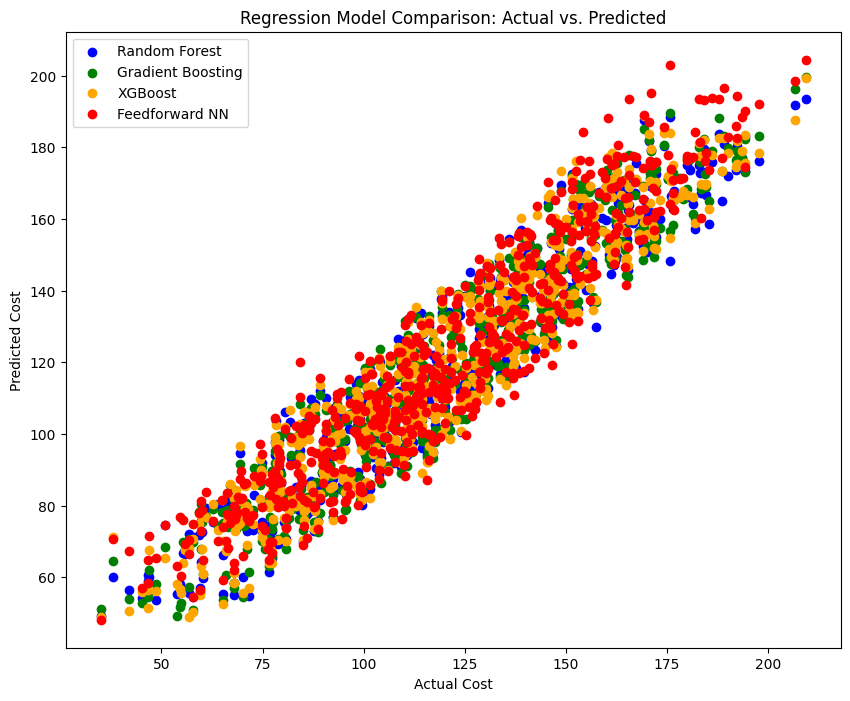

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
rf_y_pred = rf_regressor.predict(X_test_scaled)

# Gradient Boosting Regression
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_regressor.fit(X_train_scaled, y_train)
gb_y_pred = gb_regressor.predict(X_test_scaled)

# XGBoost Regression
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)
xgb_y_pred = xgb_regressor.predict(X_test_scaled)

# Feedforward Neural Network Regression
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer with one neuron for regression
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)
nn_y_pred = model.predict(X_test_scaled)

# Plotting
plt.figure(figsize=(10, 8))

plt.scatter(y_test, rf_y_pred, color='blue', label='Random Forest')
plt.scatter(y_test, gb_y_pred, color='green', label='Gradient Boosting')
plt.scatter(y_test, xgb_y_pred, color='orange', label='XGBoost')
plt.scatter(y_test, nn_y_pred, color='red', label='Feedforward NN')

plt.xlabel('Actual Cost')
plt.ylabel('Predicted Cost')
plt.title('Regression Model Comparison: Actual vs. Predicted')
plt.legend()
plt.show()

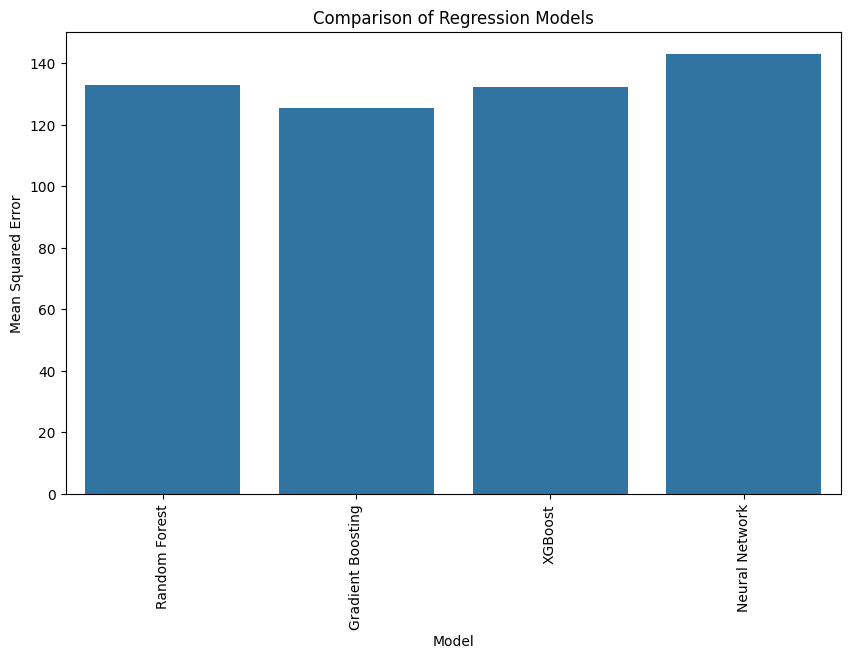

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace with your actual model names and MSE scores)
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Neural Network']
mse_scores = [132.89, 125.50, 132.19, 143.05]  # Example MSE scores for each model

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=mse_scores)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Regression Models')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
